In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

Dataset: https://www.kaggle.com/c/dogs-vs-cats

In [2]:
#Organize data into train, valid, test dirs
os.chdir('Dogs vs Cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')
os.chdir('../../')

In [6]:
train_path='Keras/Dogs vs Cats/train'
valid_path='Keras/Dogs vs Cats/valid'
test_path='Keras/Dogs vs Cats/test'

In [61]:
train_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
valid_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
test_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [62]:
train_batches

In [63]:
train_batches.num_classes

2

In [64]:
train_batches.n

1000

In [65]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [66]:
imgs, labels = next(train_batches)

In [67]:
#This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(image_arr):
    fig, axes= plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

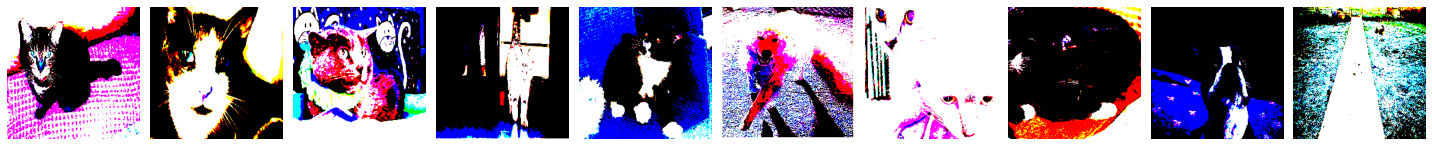

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [68]:
plotImages(imgs)
print(labels)

Build and train a CNN

In [69]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
100/100 - 29s - loss: 15.3175 - accuracy: 0.5550 - val_loss: 4.9248 - val_accuracy: 0.6600
Epoch 2/10
100/100 - 33s - loss: 2.1527 - accuracy: 0.7750 - val_loss: 3.3033 - val_accuracy: 0.6800
Epoch 3/10
100/100 - 33s - loss: 0.7430 - accuracy: 0.8870 - val_loss: 2.8278 - val_accuracy: 0.6900
Epoch 4/10
100/100 - 35s - loss: 0.1827 - accuracy: 0.9540 - val_loss: 2.6190 - val_accuracy: 0.6250
Epoch 5/10
100/100 - 36s - loss: 0.1374 - accuracy: 0.9670 - val_loss: 2.3638 - val_accuracy: 0.6650
Epoch 6/10
100/100 - 35s - loss: 0.1558 - accuracy: 0.9590 - val_loss: 2.3173 - val_accuracy: 0.6750
Epoch 7/10
100/100 - 36s - loss: 0.0646 - accuracy: 0.9810 - val_loss: 2.4814 - val_accuracy: 0.7100
Epoch 8/10
100/100 - 36s - loss: 0.0124 - accuracy: 0.9980 - val_loss: 3.0678 - val_accuracy: 0.6750
Epoch 9/10
100/100 - 36s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 2.4360 - val_accuracy: 0.6850
Epoch 10/10
100/100 - 35s - loss: 1.8410e-04 - accuracy: 1.0000 - val_loss: 2.3315 - val_a

In [79]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
predictions=model.predict(x=test_batches,verbose=0)

In [88]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [89]:
np.argmax(predictions,axis=-1)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [90]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [91]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[38 12]
 [19 31]]


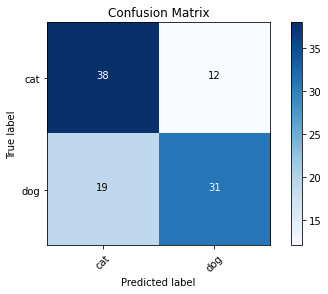

In [92]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

Training results has 100% accuracy while validation results has 70% accuracy - means we have a problem of over-fitting

Build a Fine-tuned VGG16 model

In [25]:
#Download model
vgg16_model=tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 134s 0us/step


In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
'''def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params,'trainable_params': trainable_params}'''

"def count_params(model):\n    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])\n    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])\n    return {'non_trainable_params': non_trainable_params,'trainable_params': trainable_params}"

In [34]:
'''params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert ['trainable_params'] == 138357544'''

"params = count_params(vgg16_model)\nassert params['non_trainable_params'] == 0\nassert ['trainable_params'] == 138357544"

In [30]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [43]:
#Here we are trying to use the vgg16_model. But since we don't want a 1000 class output and just need 2 class output, we will 
#be importing all of the model except for the last predictions layer
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [44]:
vgg16_model.layers

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [46]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

AssertionError: 

In [47]:
#Here we are trying to freeze the weights. Whenever there is a training going to happen, all the layers in the 'model' 
#wouldn't get trained, as they are pre-trained with cats and dogs images.

for layer in model.layers:
    layer.trainable = False

In [48]:
model.add(Dense(units=2, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [50]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

Training the fine-tuned VGG16 model

In [51]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
100/100 - 269s - loss: 0.3679 - accuracy: 0.8700 - val_loss: 0.1708 - val_accuracy: 0.9800
Epoch 2/5
100/100 - 273s - loss: 0.1162 - accuracy: 0.9760 - val_loss: 0.1124 - val_accuracy: 0.9800
Epoch 3/5
100/100 - 254s - loss: 0.0789 - accuracy: 0.9800 - val_loss: 0.0898 - val_accuracy: 0.9800
Epoch 4/5
100/100 - 261s - loss: 0.0612 - accuracy: 0.9870 - val_loss: 0.0797 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 258s - loss: 0.0502 - accuracy: 0.9860 - val_loss: 0.0733 - val_accuracy: 0.9800


In [53]:
assert model.history.history.get('accuracy')[-1]>0.95

Predict using fine-tuned VGG16 model

In [54]:
predictions=model.predict(x=test_batches,verbose=0)

In [56]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions, axis=-1))

In [57]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [58]:
cm_plot_labels=['cat','dog']
cm

array([[47,  3],
       [ 0, 50]], dtype=int64)

In [59]:
#Copied from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[47  3]
 [ 0 50]]


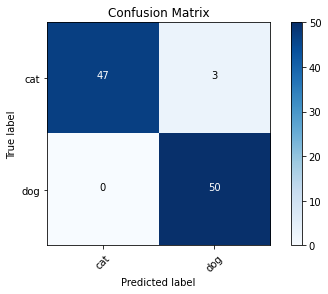

In [60]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')